In [3]:
# Kolminkertainen eksponentiaalinen tasoitus
# Kolminkertaista eksponentiaalista tasoitusta kutsutaan myös Holt-Winterin malliksi. Eksponentiaalisen tasoituksen 
#mallit (yksinkertainen, kaksinkertainen ja kolminkertainen) ovat erityisen suosittuja liiketaloudessa kysynnän 
#ennustamisessa. Mallit ovat helppokäyttöisiä, nopeasti laskettavissa ja helposti päivitettävissä uusien havaintojen myötä.
# Holt-Winterin malli huomioi sekä trendin että kausivaihtelun.
# Eksponentiaalinen tasoitus löytyy statsmodels.tsa-kirjastosta.

import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.api import seasonal_decompose
from statsmodels.tsa.api import ExponentialSmoothing

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [4]:
df=pd.read_excel('Saapuneet puhelut kktasolla.xlsx')
df

,Kuukausi,Saapuneet
0,2017-12-01,3714
1,2018-01-01,6185
2,2018-02-01,5615
3,2018-03-01,5381
4,2018-04-01,7284
5,2018-05-01,20116
6,2018-06-01,13238
7,2018-07-01,7594
8,2018-08-01,7968
9,2018-09-01,31344


In [6]:
df.index = pd.to_datetime(df['Kuukausi'],format="%Y-%m")
df=df.drop('Kuukausi',axis=1)
df

,Saapuneet
Kuukausi,
2017-12-01,3714
2018-01-01,6185
2018-02-01,5615
2018-03-01,5381
2018-04-01,7284
2018-05-01,20116
2018-06-01,13238
2018-07-01,7594
2018-08-01,7968


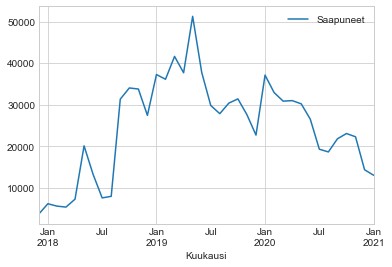

In [7]:
df.plot()

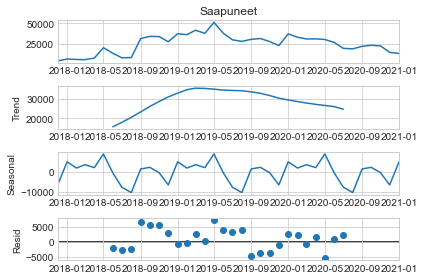

In [8]:
# Aikasarjan vaihtelua aiheuttavien komponenttien erottelu
# Observed=alkuperäinen aikasarja, Trend=trendi, Seasonal=kausivaihtelu,
# Residual=muu kuin trendiin ja kausivaihteluun liittyvä vaihtelu

decompose = seasonal_decompose(df['Saapuneet']).plot()

In [9]:
#Mallin sovitus
#Ennustemalli sovitetaan (fit()) dataan. Tuloksena saadaan olio (tässä olen antanut oliolle nimeksi malli), joka sisältää monenlaista tietoa mallista.
#Trendiin (trend) käytän summamallia (add), jossa trendi on aikasarjaan lisättävä termi. Tämä on suositeltavin vaihtoehto.
#Kausivaihteluun (seasonal) käytän summamallia (add) tai tulomallia (mul). Tulomallissa kausivaihtelu ilmenee kertoimina. Tässä olen kokeillut myös summamallia, mutta tulomalli osoittautui paremmaksi.
#seasonal_periods-parametrille käytän arvoa 5, koska kausivaihtelu esiintyy viiden kuukauden jaksoissa.
#freq-parametrille käytän arvoa 'MS', koska kyseessä ovat kuukauden ensimmäiset päivät. Lisätietoa freq-parametrin mahdollisista arvoista https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases
malli = ExponentialSmoothing(df['Saapuneet'], trend = 'add', seasonal = 'mul', 
                             seasonal_periods = 5, freq='MS').fit()

In [10]:
# malli-olion avulla saan mallin mukaan simuloidut ennusteet (fittedvalues) jo toteutuneille ajankohdille
df['Ennuste'] = malli.fittedvalues
df

,Saapuneet,Ennuste
Kuukausi,,
2017-12-01,3714,3895.067894
2018-01-01,6185,3665.941949
2018-02-01,5615,6380.923863
2018-03-01,5381,5692.822177
2018-04-01,7284,5513.162132
2018-05-01,20116,8233.300716
2018-06-01,13238,16945.551614
2018-07-01,7594,14799.241366
2018-08-01,7968,8494.839723


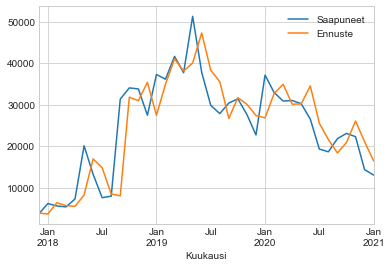

In [11]:
# Alkuperäinen aikasarja ja mallin mukaiset ennusteet samaan kaavioon
df.plot()

In [12]:
# Ennustevirheet (residuaalit) löytyvät malli-oliosta
df['Ennustevirhe'] = malli.resid
df

,Saapuneet,Ennuste,Ennustevirhe
Kuukausi,,,
2017-12-01,3714,3895.067894,-181.067894
2018-01-01,6185,3665.941949,2519.058051
2018-02-01,5615,6380.923863,-765.923863
2018-03-01,5381,5692.822177,-311.822177
2018-04-01,7284,5513.162132,1770.837868
2018-05-01,20116,8233.300716,11882.699284
2018-06-01,13238,16945.551614,-3707.551614
2018-07-01,7594,14799.241366,-7205.241366
2018-08-01,7968,8494.839723,-526.839723


Text(0, 0.5, 'Ennustevirhe')

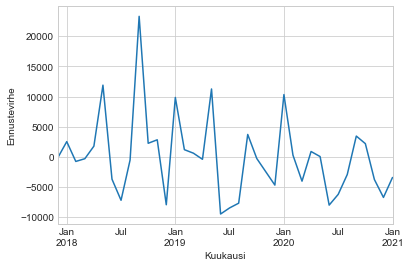

In [13]:
#Mallin tarkastelu
#Mallin hyvyyden tarkasteluun on monia tapoja. Tässä käytän
#ennustevirheiden aikasarjaa viivakaaviona
#ennusteiden ja toteutuneiden arvojen hajontakaaviota
#malliin liittyvää statistiikkaa, jonka saan summary()-toiminnolla.
#Huomaa erityisesti SSE (sum of squared errors). Mallia laskeva algoritmi yrittää saada SSE:n mahdollisimman pieneksi.
# Ennustevirheet aikasarjana
# On hyvä, jos ennustevirheiden aikasarjan vaihtelu on sattumanvaraista
df['Ennustevirhe'].plot()
plt.ylabel('Ennustevirhe')

Text(0, 0.5, 'Toteutunut kysyntä')

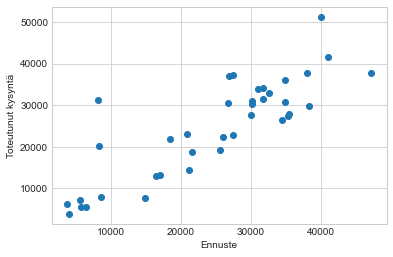

In [14]:
# Ennusteiden ja toteutuneiden kysyntöjen hajontakaavio
# Ennustemalli on sitä parempi, mitä paremmin pisteet seuraavat suoraa viivaa
# vasemmasta alakulmasta oikeaan yläkulmaan
plt.scatter(x = df['Ennuste'], y = df['Saapuneet'])
plt.xlabel('Ennuste')
plt.ylabel('Toteutunut kysyntä')

In [15]:
malli.summary()

Dep. Variable:,endog,No. Observations:,38
Model:,ExponentialSmoothing,SSE,1646834188.680
Optimized:,True,AIC,686.212
Trend:,Additive,BIC,700.951
Seasonal:,Multiplicative,AICC,696.366
Seasonal Periods:,5,Date:,"Tue, 02 Feb 2021"
Box-Cox:,False,Time:,09:04:36
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.8485801,alpha,True
smoothing_slope,5.6353e-17,beta,True


In [16]:
#Ennusteiden laskeminen
#Ennustettavien ajankohtien aikaleimojen määrittämiseksi:
#Ensimmäisen ennustettavan ajankohdan aikaleiman täytyy olla aikasarjan viimeisintä aikaleimaa seuraava aikaleima.
#Ennustettavien ajankohtien lukumäärän voin määrittää periods-parametrilla.
#Ennustettavien ajankohtien frekvenssin on oltava sama kuin mallia sovitettaessa käytetty freq-parametrin arvo.
#Lisätietoa freq-parametrin mahdollisista arvoista https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases
#Tarkistan viimeisen aikaleiman
df.tail()

,Saapuneet,Ennuste,Ennustevirhe
Kuukausi,,,
2020-09-01,21814,18374.409694,3439.590306
2020-10-01,23083,20898.595281,2184.404719
2020-11-01,22302,26067.371201,-3765.371201
2020-12-01,14365,21096.018882,-6731.018882
2021-01-01,13044,16467.793093,-3423.793093


In [17]:
# Ennustettavien ajankohtien aikaleimat (alkupäivänä aikasarjan viimeistä aikaleimaa seuraava aikaleima)
index = pd.date_range('2021-02-01', periods = 6, freq = 'MS')

# Ennusteet 6 kuukaudelle
ennusteet = malli.forecast(6)

# Ennusteet dataframeen
df_ennuste = pd.DataFrame(data = ennusteet, index = index, 
                          columns = ['Ennuste'])
df_ennuste

,Ennuste
2021-02-01,13121.247429
2021-03-01,12973.666847
2021-04-01,14985.296088
2021-05-01,13910.277736
2021-06-01,14915.980638
2021-07-01,14405.140004


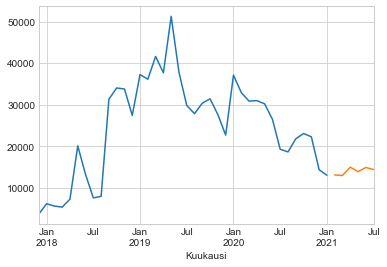

In [18]:
# Viivakaavio havainnoista
df['Saapuneet'].plot()

# Ennusteet kaavioon
df_ennuste['Ennuste'].plot()

In [19]:
# Dataframe, jossa alkuperäinen aikasarja ja lasketut ennusteet
df1 = pd.concat([df, df_ennuste])
df1

,Saapuneet,Ennuste,Ennustevirhe
2017-12-01,3714.0,3895.067894,-181.067894
2018-01-01,6185.0,3665.941949,2519.058051
2018-02-01,5615.0,6380.923863,-765.923863
2018-03-01,5381.0,5692.822177,-311.822177
2018-04-01,7284.0,5513.162132,1770.837868
2018-05-01,20116.0,8233.300716,11882.699284
2018-06-01,13238.0,16945.551614,-3707.551614
2018-07-01,7594.0,14799.241366,-7205.241366
2018-08-01,7968.0,8494.839723,-526.839723
2018-09-01,31344.0,8053.542316,23290.457684
